# Carbon Emissions Maps

In [1]:
from postreise.analyze.generation import emissions
from powersimdata.scenario.scenario import Scenario
from postreise.plot import plot_carbon_map, plot_carbon_bar
from bokeh.io import show

Here, we consider our *2020 base scenario*. This is the scenario presented in the scrolly telling on our webpage: https://science.breakthroughenergy.org/.

In [2]:
base = Scenario("824") 

SCENARIO: Julia | USABase_2020_Anchor_profile_fix_1

--> State
analyze
--> Loading grid
Loading bus
Loading plant
Loading heat_rate_curve
Loading gencost_before
Loading gencost_after
Loading branch
Loading dcline
Loading sub
Loading bus2sub
--> Loading ct


In [3]:
base_grid = base.state.get_grid()

The second scenario is our *2030 Ambitious HVDC Design 3 OB1 (Transmission-heavy)*. It can be found on our website dashboard (https://science.breakthroughenergy.org/dashboard).

In [4]:
ambitious = Scenario("1270") 

SCENARIO: Julia | USA2030HVDC_Design3_OB1_Mesh500x38

--> State
analyze
--> Loading grid
Loading bus
Loading plant
Loading heat_rate_curve
Loading gencost_before
Loading gencost_after
Loading branch
Loading dcline
Loading sub
Loading bus2sub
--> Loading ct


In [5]:
ambitious_grid = ambitious.state.get_grid()

## Summarize Carbon Emission by Bus

In [6]:
base_carbon_by_bus = emissions.summarize_emissions_by_bus(emissions.generate_emissions_stats(base), 
                                                          base_grid)

--> Loading PG


In [7]:
ambitious_carbon_by_bus = emissions.summarize_emissions_by_bus(emissions.generate_emissions_stats(ambitious), 
                                                               ambitious_grid)

--> Loading PG


In [8]:
base_bus_agg = plot_carbon_map.combine_bus_info_and_emission(base_grid.bus, base_carbon_by_bus)
ambitious_bus_agg = plot_carbon_map.combine_bus_info_and_emission(ambitious_grid.bus, ambitious_carbon_by_bus)

## Carbon Emission Maps

In [9]:
base_carbon_map = plot_carbon_map.map_carbon_emission(base_bus_agg,
                                                      size_factor=1,
                                                      web=True, 
                                                      agg=False)
show(base_carbon_map)

In [10]:
ambitious_carbon_map = plot_carbon_map.map_carbon_emission(ambitious_bus_agg,
                                                           size_factor=1,
                                                           web=True, 
                                                           agg=False)
show(ambitious_carbon_map)

## Emission Comparison
Relative emission in emission level between the two scenarios. The base scenario is the reference.

In [11]:
comp = plot_carbon_map.map_carbon_emission_comparison(base_bus_agg, ambitious_bus_agg, web=True)
show(comp)

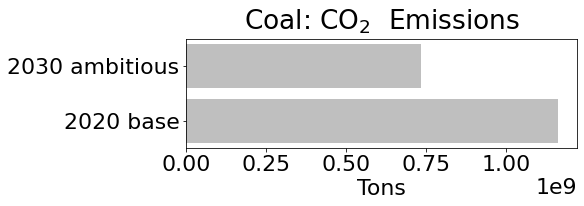

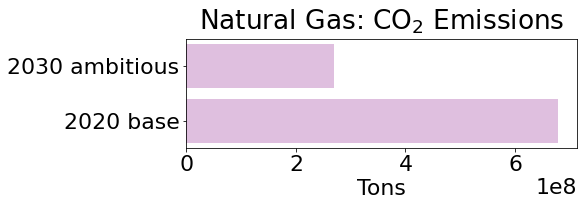

In [12]:
plot_carbon_bar.plot_carbon_bar(base_carbon_by_bus, ambitious_carbon_by_bus, "2020 base", "2030 ambitious")

## Carbon Difference
Print percentage change in carbon emissions of the two scenarios

In [13]:
plot_carbon_bar.print_carbon_diff(base_carbon_by_bus, ambitious_carbon_by_bus)

45%
